<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section2_Lab2_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
SEED = 42
np.random.seed(SEED)

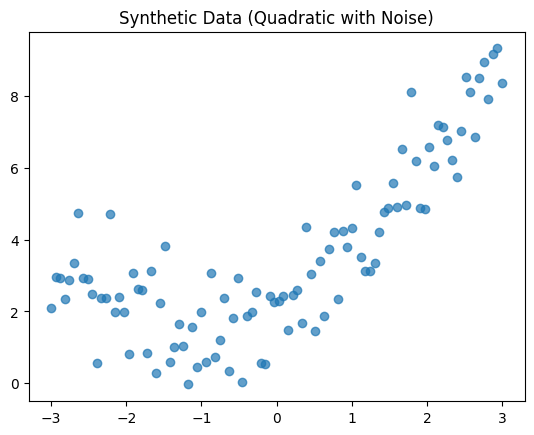

In [ ]:
# True function: y = 0.5x^2 + x + 2 + noise
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5*X**2 + X + 2 + np.random.randn(100, 1)
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Data (Quadratic with Noise)")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

Degree 1: Train MSE=2.704, Test MSE=1.824
Degree 1: Train R=0.542, Test R=0.574


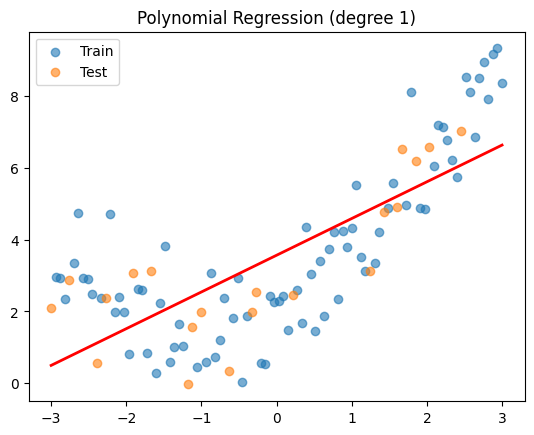

Degree 2: Train MSE=0.898, Test MSE=0.900
Degree 2: Train R=0.848, Test R=0.790


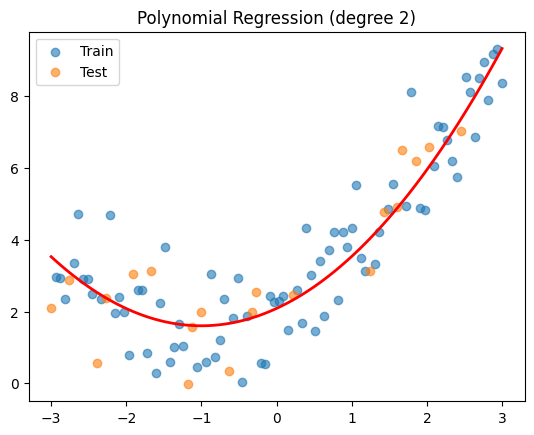

Degree 10: Train MSE=0.837, Test MSE=0.891
Degree 10: Train R=0.858, Test R=0.792


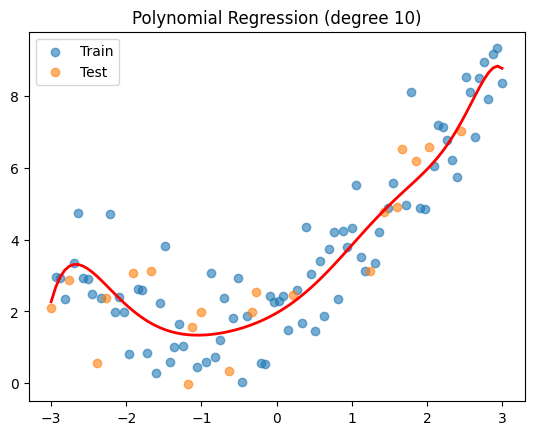

In [ ]:
def train_and_evaluate(degree):
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Degree {degree}: Train MSE={train_mse:.3f}, Test MSE={test_mse:.3f}")
    print(f"Degree {degree}: Train R={ r2_train:.3f}, Test R={r2_test:.3f}")

    # Plot predictions vs data
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_pred_range = model.predict(X_range)
    plt.scatter(X_train, y_train, label="Train", alpha=0.6)
    plt.scatter(X_test, y_test, label="Test", alpha=0.6)
    plt.plot(X_range, y_pred_range, color="red", linewidth=2)
    plt.legend()
    plt.title(f"Polynomial Regression (degree {degree})")
    plt.show()


for d in [1, 2, 10]:
    train_and_evaluate(d)


* Degree 1 (linear): underfits → poor fit, low R²
* Degree 2: good fit → close to true function
* Degree 10: overfits → train perfect, test poor

# Let’s see how model performance evolves with more data.


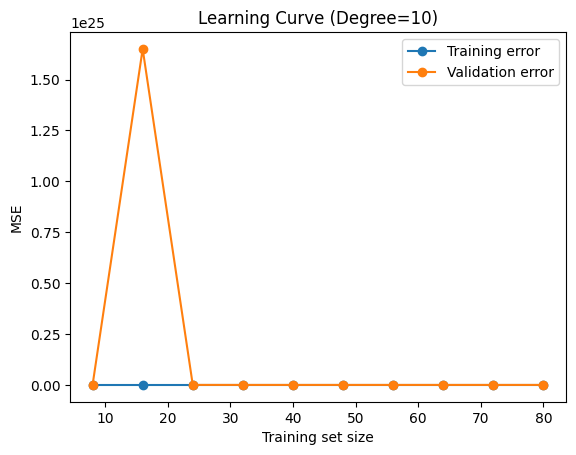

[ 8 16 24 32 40 48 56 64 72 80]


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    Pipeline([
        ("poly", PolynomialFeatures(degree=10, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ]),
    X, y.ravel(), cv=5,
    scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=SEED
)
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
plt.plot(train_sizes, train_mean, "o-", label="Training error")
plt.plot(train_sizes, test_mean, "o-", label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("MSE")
plt.title("Learning Curve (Degree=10)")
plt.legend()


* MSE (Mean Squared Error): lower is better; penalizes large errors.
* R² (coefficient of determination): closer to 1 = better; <0 means worse than baseline.